# Thermodynamics of the Ising model, using a Monte Carlo method

In [215]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from numba import autojit

# a) Define a Magnetisation function which calculates the sum of all spin values. What is the typical magnetisation of random spins.

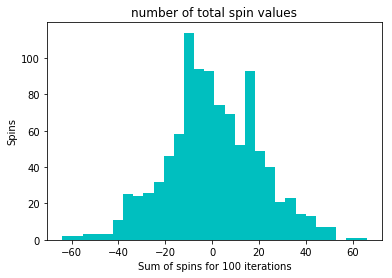

In [244]:
N = 20
result = []
for i in range(1000):
    state = rnd.choice([-1,1], size=(N,N))
    new_state = state.copy()
    
    plt.title("number of total spin values")
    plt.xlabel("Sum of spins for 100 iterations")
    plt.ylabel("Spins")
    result.append(state.sum())

plt.hist(result,bins=30,color='c');

## This shows that over 100 iterations the total value of the 400 spins will tend to a number around 0. This is expected as there is an equal chance of a spin being -1 or 1. 

# ---------------------------------------------------------------------------------------------------------------

# b) Make a histogram of the energy of 10,000 random spin configurations.

In [217]:
# Generate a bunch of spins
N = 20
state = rnd.choice([-1,1], size=(N,N))

In [218]:
# Copy proposal from above, and modify for (-1,1) spins
    
def proposal(state):
    new_state = state.copy()
    i = rnd.randint(0,N)
    j = rnd.randint(0,N)
       
    if state[i,j] == 1:
        new_state[i,j] = -1
    else:
        new_state[i,j] = 1

    return new_state       

In [219]:
J = 1.

@autojit
def Energy(spin):
    E = 0
    N = len(spin)
    for i in range(N):
        for j in range (N):
            Main = spin[i,j]
            Neighbours = spin[(i+1)%N, j] + spin[i,(j+1)%N] + spin[(i-1)%N,j] + spin[i,(j-1)%N]
            E += -J*Main*Neighbours/2 #- -1*Main
    
    return E

In [220]:
E_values = []
for i in range(10000):
    state = rnd.choice([-1,1], size=(N,N))
    energy = Energy(state)
    E_values.append(energy)

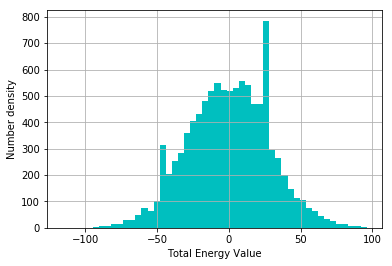

In [241]:
plt.hist(E_values,bins=50,color='c');
plt.xlabel("Total Energy Value")
plt.ylabel("Number density")
plt.grid()

## This shows that the energy is centered around zero and is guassian distribution.

# ---------------------------------------------------------------------------------------------------------------

# c)

In [229]:
@autojit
def MC(T,num_step=10000):
    state = rnd.choice([-1,1], size=(N,N))
    Magnetise = []
    E = []
    

    for k in range(num_step):
    # Propose a new state
        new_state = proposal(state)
    
        Enew = Energy(new_state)
        Eold = Energy(state)
        Ediff = Enew - Eold
    
        Pa = np.exp((-Ediff)/T)
    
        if (Pa >= 1) or rnd.binomial(1, Pa):
            state = new_state
        else:
            pass
        Magnetise.append(state.sum())
        E.append(Enew)
           
    return Magnetise,E

# ---------------------------------------------------------------------------------------------------------------

# d) Running the simulation at T=5 with number of steps at 1000.

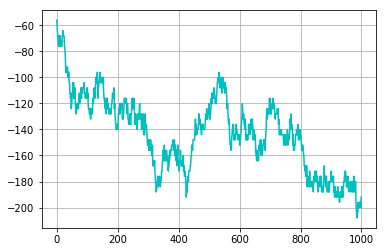

In [240]:
Magnetise,E = MC(5,num_step=1000)
plt.plot(E,c='c')
plt.grid()

# ---------------------------------------------------------------------------------------------------------------

# Same temperature but 20,000 steps.

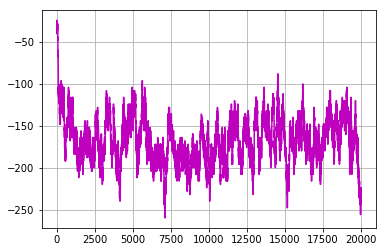

In [239]:
Magnetise,E = MC(5,num_step=20000)
plt.plot(E,c='m')
plt.grid()

### This shows that 20,000 steps is enough steps for the simulation to run to the point where there is no overall change in either the energy or the magnetisation.

# ---------------------------------------------------------------------------------------------------------------

# This is the history of the magnetization over 5 runs.

Text(0.5,1,'Energy')

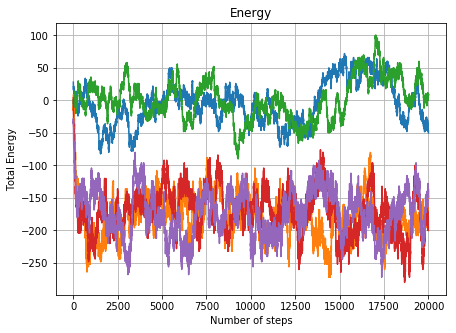

In [234]:
fig = plt.figure(figsize=(7,5))
Magnetise,E = [MC(5,num_step=20000) for i in range(2)]
plt.plot(np.array(E).T);
Magnetise,E = [MC(5,num_step=20000) for i in range(2)]
plt.plot(np.array(E).T);
Magnetise,E = MC(5,num_step=20000)
plt.plot(np.array(E).T);
plt.xlabel("Number of steps")
plt.ylabel("Total Energy")
plt.grid()
plt.title("Energy")

### This shows the magnet will either magnetise in one direction or the other and will then either have a positive or negative overal energy. All 5 plots take one of two paths and generally when they do this, they look similar.

# ---------------------------------------------------------------------------------------------------------------

Text(0.5,1,'Magnetisation')

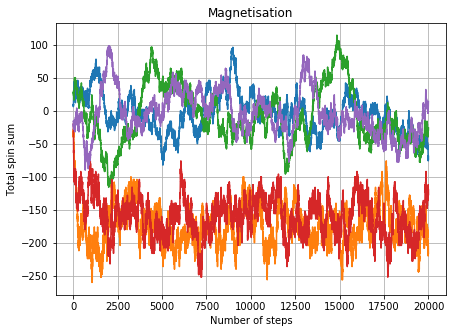

In [235]:
fig = plt.figure(figsize=(7,5))
Magnetise,E = [MC(5,num_step=20000) for i in range(2)]
plt.plot(np.array(Magnetise).T);
Magnetise,E = [MC(5,num_step=20000) for i in range(2)]
plt.plot(np.array(Magnetise).T);
Magnetise,E = MC(5,num_step=20000)
plt.plot(np.array(Magnetise).T);
plt.xlabel("Number of steps")
plt.ylabel("Total spin sum")
plt.grid()
plt.title("Magnetisation")

### this is howing the total magnetisation of the magnet at T=5 and also shows the magnet either magnetising in one direction or the other with a level of iratic behaviour due to the high temperature.

# ---------------------------------------------------------------------------------------------------------------

# e) Now simulating at 0.5 T.

Text(0.5,1,'Energy')

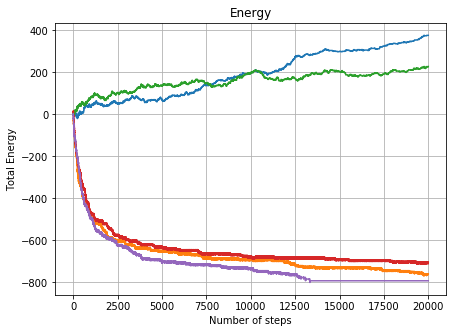

In [236]:
fig = plt.figure(figsize=(7,5))
Magnetise,E = [MC(0.5,num_step=20000) for i in range(2)]
plt.plot(np.array(E).T);
Magnetise,E = [MC(0.5,num_step=20000) for i in range(2)]
plt.plot(np.array(E).T);
Magnetise,E = MC(0.5,num_step=20000)
plt.plot(np.array(E).T);
plt.xlabel("Number of steps")
plt.ylabel("Total Energy")
plt.grid()
plt.title("Energy")

### The story changes when the temperature is brought down to T=0.5. At a low temperature the magnet is able to stabalise very quickly and the energy of the magnet is reflected within that quick magnetisation.

# ---------------------------------------------------------------------------------------------------------------

Text(0.5,1,'Magnetisation')

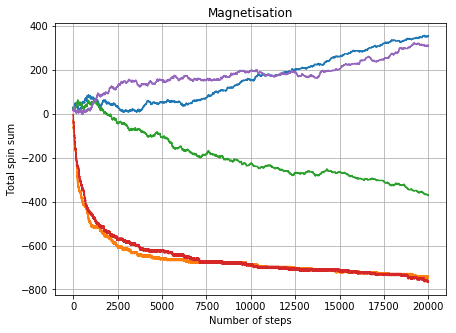

In [237]:
fig = plt.figure(figsize=(7,5))
Magnetise,E = [MC(0.5,num_step=20000) for i in range(2)]
plt.plot(np.array(Magnetise).T);
Magnetise,E = [MC(0.5,num_step=20000) for i in range(2)]
plt.plot(np.array(Magnetise).T);
Magnetise,E = MC(0.5,num_step=20000)
plt.plot(np.array(Magnetise).T);
plt.xlabel("Number of steps")
plt.ylabel("Total spin sum")
plt.grid()
plt.title("Magnetisation")

In [214]:
Magnetise,E = [MC(0.5,num_step=20000) for i in range(5)]
plt.plot(np.array(Magnetise).T);

ValueError: too many values to unpack (expected 2)

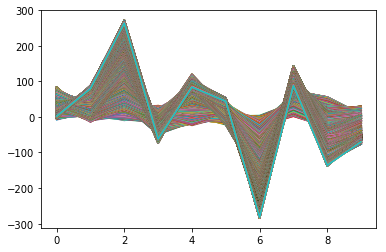

In [77]:
plt.plot(result);